ZOO DATASET

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


In [5]:
#loading the dataset
df=pd.read_csv("/content/Zoo.csv")

In [6]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [7]:
#EDA
df["type"].unique()

array([1, 4, 2, 7, 6, 5, 3])

In [8]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [10]:
#as the dataset is in form of encoding we dont need any futher encoding to be done on it as well as no scaling required

In [11]:
#independent and dependent

In [12]:
x = df.drop(columns=["animal name","type"])
y = df.iloc[:,-1]

In [13]:
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [14]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [15]:
#no.of folds to be kept
kfolds=KFold(n_splits=20)

In [16]:
# calling the kneighboursclassifier model
model=KNeighborsClassifier(n_neighbors=15)

In [17]:
#using cross_val_score for better understanding
result=cross_val_score(model,x,y,cv=kfolds)
result

array([1. , 1. , 0.4, 0.8, 0.8, 0.8, 1. , 1. , 1. , 0.8, 0.6, 1. , 0.8,
       0.8, 0.6, 0.4, 0.6, 0.6, 0.8, 0.8])

In [18]:
result.mean()

0.78

GRID SEARCH FOR ALGORITHM TUNING


In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
n = np.array(range(1,40)) # k value from 1 to 40
params = dict(n_neighbors=n)

In [21]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=params)
grid.fit(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [22]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


VISUALIZATION

In [23]:
#searching for an optical value k for knn

In [24]:
k_range=range(1,40)

In [25]:
#creating an empty list

In [26]:
k_scores=[]

In [27]:
#loop through reasonable values of k
for k in k_range:
   knn = KNeighborsClassifier(n_neighbors=k)
   scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
   #appending mean of scores for k neighbors to k_scores list
   k_scores.append(scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

In [28]:
# k_scores=grid.best_score_

In [29]:
pd.Series(k_scores).sort_values(ascending=False)


0     0.980000
2     0.950000
1     0.940000
3     0.920000
4     0.880909
5     0.870909
6     0.841818
7     0.811818
15    0.781818
21    0.781818
20    0.781818
18    0.781818
17    0.781818
16    0.781818
19    0.781818
14    0.781818
12    0.781818
11    0.781818
10    0.781818
9     0.781818
8     0.781818
13    0.781818
22    0.771818
23    0.741818
24    0.721818
28    0.702727
30    0.702727
29    0.702727
27    0.702727
26    0.702727
25    0.702727
31    0.692727
32    0.643636
33    0.593636
34    0.593636
35    0.573636
36    0.573636
37    0.573636
38    0.573636
dtype: float64

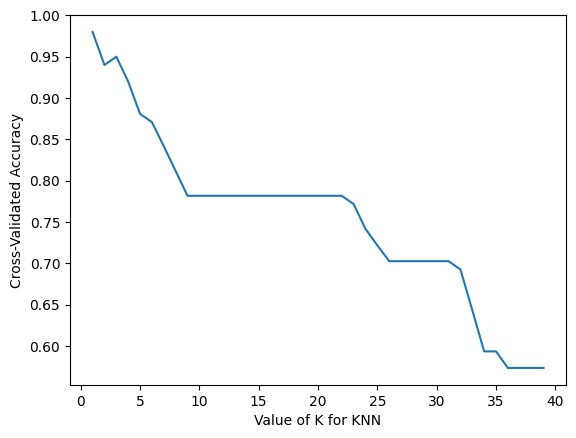

In [30]:
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

GLASS DATASET

In [31]:
#loading the dataset
df1= pd.read_csv("glass.csv")

In [32]:
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [33]:
#EDA

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [52]:
df1.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [53]:
#as there are no null values present we can move to next step

In [35]:
#independent and dependent

In [36]:
x1 = df1.iloc[:,:-1]
y1 = df1.iloc[:,-1]

In [68]:
#scaling x1 data using standardscaler

In [57]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1= sc.fit_transform(x1)

In [58]:
x1

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [59]:
#no.of folds to be defined
Kfolds=KFold(n_splits=11)

In [60]:
#calling the model
model1 = KNeighborsClassifier(n_neighbors=15)

In [61]:
#using cross_val_score for better understanding
results= cross_val_score(model1,x,y,cv=Kfolds)

In [62]:
results

array([1.        , 0.6       , 0.77777778, 1.        , 0.88888889,
       0.77777778, 0.88888889, 0.77777778, 0.44444444, 0.55555556,
       0.88888889])

In [63]:
results.mean()

0.7818181818181817

GRID SEARCH FOR ALGORITHM TUNING

In [64]:
n1 = np.array(range(1,50))
params1 = dict(n_neighbors=n1)

In [65]:
model2 = KNeighborsClassifier()
grid1 = GridSearchCV(estimator=model2, param_grid=params)
grid1.fit(x1,y1)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [67]:
print(grid1.best_score_)
print(grid1.best_params_)

0.6729789590254706
{'n_neighbors': 2}


VISUALIZATION

In [69]:
glass=pd.read_csv("glass.csv")
x1 = glass.iloc[:,:-1]
y1 = glass.iloc[:,-1]

In [72]:
x1=sc.fit_transform(x1)
x1

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [73]:
k_range = range(1, 10)

# Create an empty list for storing scores
k_scores = []

# Loop through reasonable values of k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x1, y1, cv=7, scoring='accuracy')
    k_scores.append(scores.mean())

# Convert the list of scores to a pandas Series for analysis
k_scores = pd.Series(k_scores)

# Find the optimal value of k
optimal_k = k_range[k_scores.idxmax()]
print(f"The optimal value of k is {optimal_k}")

The optimal value of k is 2


In [74]:

pd.Series(k_scores).sort_values(ascending=False)

1    0.677419
2    0.659140
4    0.649770
0    0.635330
3    0.635330
6    0.630876
7    0.621352
5    0.616743
8    0.602919
dtype: float64

In [75]:
#plot visualization for better understanding

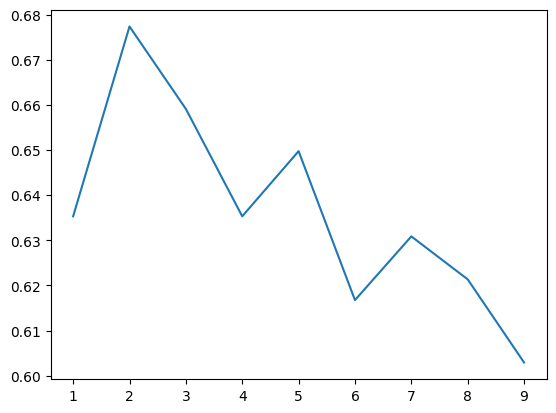

In [76]:
plt.plot(k_range,k_scores)